In [33]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from PIL import Image


# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [12]:
test_prefix_path = './asl_alphabet_test/asl_alphabet_test/'
train_prefix_path = './asl_alphabet_train/asl_alphabet_train/'
_ = os.listdir(test_prefix_path)

test_path = [test_prefix_path + x for x in _]
#print(test_path[:3])

tmp = [train_prefix_path + x for x in os.listdir(train_prefix_path)]
from glob import glob
train_path = []
for i in tmp:
    # _ = os.listdir(i)
    # _ == ['./asl_alphabet_train/asl_alphabet_train/A/A1.jpg etc.', ... ]
    for j in glob(i + '/*.jpg'):
        train_path.append(j)
print(train_path[:20], len(train_path))

['./asl_alphabet_train/asl_alphabet_train/A/A1493.jpg', './asl_alphabet_train/asl_alphabet_train/A/A1891.jpg', './asl_alphabet_train/asl_alphabet_train/A/A1901.jpg', './asl_alphabet_train/asl_alphabet_train/A/A1954.jpg', './asl_alphabet_train/asl_alphabet_train/A/A2243.jpg', './asl_alphabet_train/asl_alphabet_train/A/A2517.jpg', './asl_alphabet_train/asl_alphabet_train/A/A2625.jpg', './asl_alphabet_train/asl_alphabet_train/A/A2810.jpg', './asl_alphabet_train/asl_alphabet_train/A/A2897.jpg', './asl_alphabet_train/asl_alphabet_train/A/A2946.jpg', './asl_alphabet_train/asl_alphabet_train/A/A1.jpg', './asl_alphabet_train/asl_alphabet_train/A/A10.jpg', './asl_alphabet_train/asl_alphabet_train/A/A100.jpg', './asl_alphabet_train/asl_alphabet_train/A/A1000.jpg', './asl_alphabet_train/asl_alphabet_train/A/A1001.jpg', './asl_alphabet_train/asl_alphabet_train/A/A1002.jpg', './asl_alphabet_train/asl_alphabet_train/A/A1003.jpg', './asl_alphabet_train/asl_alphabet_train/A/A1004.jpg', './asl_alphabet

In [15]:
print(train_path[0].split('/'))

['.', 'asl_alphabet_train', 'asl_alphabet_train', 'A', 'A1493.jpg']


In [23]:
class hand_dataset(object):
    #input the path to get the data
    def __init__(self, data_path):
        self.data_path = data_path
        
    def __getitem__(self, idx):
        img_path = self.data_path[idx]
        img = Image.open(img_path)
        #get img
        #and get label from path
        label = img_path.split('/')[-2]
        
        return img,label
        
    def __len__(self):
        return len(self.data_path)
    

hand_train = hand_dataset(train_path) 
hand_test = hand_dataset(test_path)

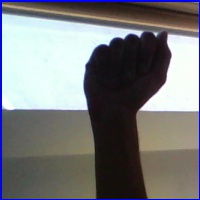

In [40]:
hand_test.__getitem__(0)[0]

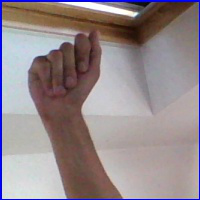

In [39]:
hand_train.__getitem__(0)[0]

In [41]:
test_data = torch.utils.data.DataLoader(
 hand_test, batch_size=2, shuffle=True, num_workers=0)
train_data = torch.utils.data.DataLoader(
 hand_train, batch_size=2, shuffle=True, num_workers=0)